# **03 - Logistic Regression**

Binary Logistic Regression is one of the most simple and commonly used Machine Learning algorithms for **two-class classification**. It is easy to implement and can be used as the baseline for any binary classification problem. Its basic fundamental concepts are also constructive in deep learning. Logistic regression describes and estimates the relationship between one dependent binary variable and independent variables.

$$
P(y = 1) = p \ , \ P(y = 0) = 1 - p \\
$$

$$
log\frac{p}{1-p} = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + \beta_{3}x_{3} + \cdot\cdot\cdot + \beta_{n}x_{n} = \beta^{T}x \\
$$

$$
p = \frac{e^{\beta^{T}x}}{1-e^{\beta^{T}x}}
$$

The classification problem is just like the regression problem, except that the values we now want to predict take on only a small number of discrete values. For now, we will focus on the binary classification problem in which y can take on only two values, 0 and 1. (Most of what we say here will also generalize to the multiple-class case.) We could approach the classification problem ignoring the fact that y is discrete-valued, and use our old linear regression algorithm to try to predict y given x. However, it is easy to construct examples where this method performs very poorly. Intuitively, it also doesn’t make sense for $h_{\theta}(x)$ to take values larger than 1 or smaller than 0 when we know that y ∈ {0, 1}. To fix this, let’s change the form for our hypotheses $h_{\theta}(x)$ to satisfy $0 \leq h_{\theta}(x) \leq 1$ This is accomplished by plugging $\theta^{T}x$ into the Logistic Function. Our new form uses the "**Sigmoid Function**," also called the "**Logistic Function**":

$$
f(x) = \frac{1}{1+e^{-(x)}}
$$

<img src="03_images/3_Sigmoid_Function.PNG" width=600px/>

First we need to define a **Probability Mass Function:**

$$
\begin{align*} 
&\ \ \ \ \ \ \ \ \ \ P(Y=1|X=x) = \frac{e^{\beta^{T}x}}{1+e^{\beta^{T}x}} \\
&\ \ \ \ \ \ \ \ \ \ P(Y=0|X=x) = 1 - \frac{e^{\beta^{T}x}}{1+e^{\beta^{T}x}} = \frac{1}{1+e^{\beta^{T}x}} \\
&\Rightarrow \ \ \ \ P(Y \ |X=x_{i}) = (\frac{e^{\beta^{T}x_{i}}}{1-e^{\beta^{T}x_{i}}})^{y_{i}} (\frac{1}{1+e^{\beta^{T}x_{i}}})^{1-y_{i}}
\end{align*} 
$$

Naturally, we want to maximize the right-hand-side of the above statement. We will use **Maximun Likelihood Estimation(MLE)** to find $\beta$:

$$
\hat{\beta}_{MLE}= argmax_{\beta} L(\beta) \\
$$

$$
L(\beta) = \prod_{i=1}^n P(Y=y_{i} |x_{i}) = \prod_{i=1}^n (\frac{e^{\beta^{T}x_{i}}}{1+e^{\beta^{T}x_{i}}})^{y_{i}} (\frac{1}{1+e^{\beta^{T}x_{i}}})^{1-y_{i}} \\
$$

$$
\begin{align*} 
l(\beta) = log\ L(\beta) &= \sum_{i=1}^n y_{i}[\beta^{T}x_{i} - log(1+e^{\beta^{T}x_{i}})] + (1-y_{i})[-log(1+e^{\beta^{T}x_{i}})] \\
&=\sum_{i=1}^n y_{i}\beta^{T}x_{i}- log(1+e^{\beta^{T}x_{i}})
\end{align*} 
$$

## Newton‐Raphson Method for Binary Logistic Regression

Newton’s Method is an iterative equation solver: it is an algorithm to find the roots of a convex function. Equivalently, the method solves for root of the derivative of the convex function. The idea behind this method is ro use a quadratic approximate of the convex function and solve for its minimum at each step. For a convex function $f(x)$, the step taken in each iteration is $-(\nabla^{2}f(x))^{-1}\nabla f(x)$. while $\lVert\nabla f(\beta)\rVert > \varepsilon$:

$$
\beta^{new} = \beta^{old}-(\nabla^{2}f(x))^{-1}\nabla f(x)
$$

Where $\nabla f(x)$ is the Gradient of $f(x)$ and $\nabla^{2} f(x)$ is the Hessian Matrix of $f(x)$.

$$
\begin{align*} 
\nabla f(x) = \frac{\partial l}{\partial \beta} &= \sum_{i=1}^n y_{i}x_{i}- (\frac{e^{\beta^{T}x_{i}}}{1+e^{\beta^{T}x_{i}}})\cdot x_{i}^{T} \\
&= \sum_{i=1}^n (y_{i}- \underbrace{\frac{e^{\beta^{T}x_{i}}}{1+e^{\beta^{T}x_{i}}}}_{p_{i}})\cdot x_{i}^{T} = X(y-p)
\end{align*} 
$$

$$
\nabla^{2}f(x) = \frac{\partial^{2} l}{\partial \beta \partial \beta^{T}} = \sum_{i=1}^n - \underbrace{\frac{e^{\beta^{T}x_{i}}}{1+e^{\beta^{T}x_{i}}}}_{p_{i}}\cdot \underbrace{\frac{1}{1+e^{\beta^{T}x_{i}}}}_{1-p_{i}}x_{i} \cdot x_{i}^{T} = -XWX^{T}
$$

Where W is a diagonal (n,n) matrix with the $i^{th}$ diagonal element defined as 
$
W = \begin{bmatrix}
p_{i}(1-p_{i}) &  &     \\
  & ... &  &   \\
  &  &  &   \\
  &  &   &   \\
\end{bmatrix}_{\ n x n}
$

The Newton‐Raphson algorithm can now be expressed as:

$$
\begin{align*} 
\beta^{new} &= \beta^{old}-(\nabla^{2}f(x))^{-1}\nabla f(x) \\
&= \beta^{old}+ (XWX^{T})^{-1}X(y-p) \\
&= \beta^{old}+ (XWX^{T})^{-1}[XWX^{T}\beta^{t}+ X(y-p)] \\
&= \beta^{old}+ (XWX^{T})^{-1}XWZ
\end{align*} 
$$

Where z can be expressed as: $Z = X^{T}\beta^{t}+ W^{-1}(y-p) $. This algorithm is also known as **Iteratively Reweighted Least Squares(IRLS)**.

$$ \beta^{t+1} = argmin_{\beta}(Z - X\beta)^{T}W(Z-X\beta) \\ $$

## Implementing Binary Logistic Regression from scratch

In [92]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import norm
from scipy.io import loadmat
from sklearn.model_selection import train_test_split

In [93]:
df = pd.read_csv('Student_Pass_Fail_Data.csv')
df.head()

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0


<AxesSubplot:xlabel='Self_Study_Daily', ylabel='Tution_Monthly'>

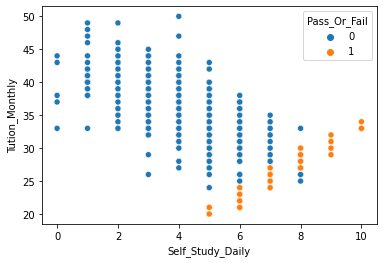

In [94]:
sns.scatterplot(x='Self_Study_Daily', y='Tution_Monthly', hue='Pass_Or_Fail', data=df)

In [95]:
x = df.drop('Pass_Or_Fail',axis = 1)
y = df.Pass_Or_Fail
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)
y_train = np.asmatrix(y_train)
y_test = np.asmatrix(y_test)

In [96]:
class LogisticRegressionUsingNR:
    def __init__(self, tol=0.0001, max_iterations=100):
        self.tol = tol
        self.max_iterations = max_iterations
        
    def p_matrix(self, x, beta):
        return 1 - (1 / (1+np.exp(np.dot(beta.T, x.T))))

    def fit(self, x, y):
        self.iterations = 0
        self.beta = np.zeros((x.shape[1], 1)) # Parameter initialization beta matrix d x 1
        
        for i in range(self.max_iterations):
            w_vec = self.p_matrix(x,self.beta) - np.square(self.p_matrix(x,self.beta))
            w_matrix = np.diagflat(w_vec) # W matrix n x n
            sec_dev = np.linalg.inv(np.dot(np.dot(x.T,w_matrix),x)) # d x d
            Newton = np.dot(np.dot(sec_dev,x.T),(y.T - self.p_matrix(x,self.beta).T))
            self.beta += Newton
            
        return self

    def predict(self, x):
        new_pi_matrix = p_matrix(x, self.beta)
        new_pi_matrix[new_pi_matrix >= 0.5] = 1
        new_pi_matrix[new_pi_matrix < 0.5] = 0
        return new_pi_matrix

In [97]:
# Model initialization
Logistic_Regression_NR = LogisticRegressionUsingNR()
# Fit the data(train the model)
Logistic_Regression_NR.fit(x_train, y_train)
# Predict
y_pred = Logistic_Regression_NR.predict(x_test)

In [98]:
test_accuracy_percentage = (1 - (np.sum(np.square(y_pred-y_test))) / np.int(y_test.shape[1])) * 100
test_accuracy_percentage

96.8

## Implementing Binary Logistic Regression from Scikit-learn

In [99]:
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train)
y_pred = logistic_regression.predict(x_test)

In [101]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

96.8

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       128
           1       0.94      1.00      0.97       122

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



### Plot the Decision Boundary for the Model

Text(0.5, 1.0, 'Decision boundary for the Logistic Regression Model')

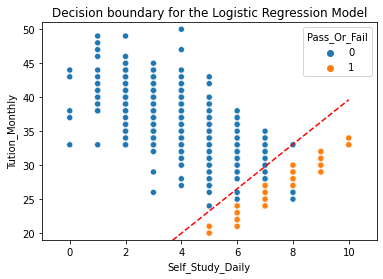

In [103]:
beta_1, beta_2 =logistic_regression.coef_.T
beta_0 = logistic_regression.intercept_[0]

# Calculate the intercept and gradient of the decision boundary.
c = -beta_0/beta_2
m = -beta_1/beta_2

xd = np.array([0, 10])
yd = m*xd + c

g =sns.scatterplot(x='Self_Study_Daily', y='Tution_Monthly', hue='Pass_Or_Fail', data=df)
plt.plot(xd, yd, color='red', ls='--')
g.set_xlim([-1.0, 11.0])
g.set_ylim([19.0, 51.0])
g.set_title('Decision boundary for the Logistic Regression Model')

### ROC Curve

The **receiver operating characteristic (ROC) curve** is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

[Text(0.5, 0, 'False Positive Rate'),
 Text(0, 0.5, 'True Positive Rate'),
 Text(0.5, 1.0, 'Receiver operating characteristic')]

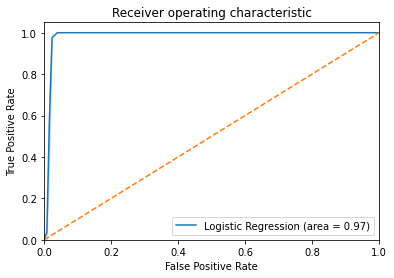

In [104]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(x_test)[:,1])

g = sns.lineplot(x=fpr, y=tpr, palette = 'blue', label = 'Logistic Regression (area = 0.97)')
sns.lineplot(x=[0, 1], y=[0, 1], palette = 'r')
g.lines[1].set_linestyle("--")
g.set_xlim([0.0, 1.0])
g.set_ylim([0.0, 1.05])
g.legend(loc="lower right")
g.set(xlabel='False Positive Rate', ylabel='True Positive Rate', title='Receiver operating characteristic')

## Other types of Logistic Regression

### Multinomial Logistic Regression

Three or more categories without ordering. Example: Predicting which food is preferred more (Veg, Non-Veg, Vegan).

### Ordinal Logistic Regression

Three or more categories with ordering. Example: Movie rating from 1 to 5.

## References

[1] $\ \ \ \$ K, D. (2021, April 8). Logistic Regression in Python using Scikit-learn. Medium. https://heartbeat.fritz.ai/logistic-regression-in-python-using-scikit-learn-d34e882eebb1. 

[2] $\ \ \ \$ Li, S. (2019, February 27). Building A Logistic Regression in Python, Step by Step. Medium. https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8. 

[3] $\ \ \ \$ Christian. (2020, September 17). Plotting the decision boundary of a logistic regression model. https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/.